In [1]:
import math
import numpy as np
from scipy.special import expit
from scipy.special import logit

In [2]:
# Calculate the inverse logit of 0, -Inf, 2, and -0.2
print('logit of 0:',math.exp(0) / (math.exp(0) + 1))    # equivalent to plogis()
print('logit of -Inf:',expit(-np.inf))                  # infinite dispreference = likelihood 0
print('logit of 2:',expit(2))                           # moderate preference = 88% chance (e.g., of purchase)
print('logit of -0.2:',expit(-0.2))                     # weak dispreference

logit of 0: 0.5
logit of -Inf: 0.0
logit of 2: 0.8807970779778823
logit of -0.2: 0.45016600268752216


In [3]:
# Calculate the logit of 0.5 and 0.88
print('Logit of 0.5:',math.log(0.5 / (1-0.5)))       # indifference = 50% likelihood = 0 utility
print('Logit of 0.88:',math.log(0.88 / (1-0.88)))    # moderate high likelihood
print('Logit of 0.88:',logit(0.88))                  # equivalent to hand computation

Logit of 0.5: 0.0
Logit of 0.88: 1.9924301646902063
Logit of 0.88: 1.9924301646902063


In [4]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

In [5]:
#Retrieve the amusement park dataset
url = "http://goo.gl/J8MH6A"
pass_df = pd.read_csv(url)

In [6]:
# Change the data type of the 'Pass' column to categorical
pass_df["Pass"] = pd.Categorical(pass_df["Pass"])

# Build the logistic regression model to predict the probability of getting a pass
pass_m = smf.glm(formula='Pass ~ Promo', data=pass_df, family=sm.families.Binomial()).fit()
print(pass_m.summary())

                         Generalized Linear Model Regression Results                         
Dep. Variable:     ['Pass[NoPass]', 'Pass[YesPass]']   No. Observations:                 3156
Model:                                           GLM   Df Residuals:                     3154
Model Family:                               Binomial   Df Model:                            1
Link Function:                                 Logit   Scale:                          1.0000
Method:                                         IRLS   Log-Likelihood:                -2172.7
Date:                               Thu, 23 Mar 2023   Deviance:                       4345.4
Time:                                       19:02:03   Pearson chi2:                 3.16e+03
No. Iterations:                                    4   Pseudo R-squ. (CS):           0.009324
Covariance Type:                           nonrobust                                         
                        coef    std err          z      P>|z

In [7]:
#Compute the odds ratio
odds_ratio = np.exp(pass_m.params[1])
print('The odds ratio of the predictor:\n',odds_ratio)

ci = pass_m.conf_int()
ci['Odds ratio'] = np.exp(pass_m.params)
ci.columns = ['2.5%', '97.5%', 'Odds ratio']
print('The confidence interval for the odds ratio:\n', ci)

The odds ratio of the predictor:
 1.475196204408425
The confidence interval for the odds ratio:
                        2.5%     97.5%  Odds ratio
Intercept         -0.292839 -0.100298    0.821545
Promo[T.NoBundle]  0.248319  0.529263    1.475196


In [8]:
# Compute the contingency table of Pass vs Channel
ct = pd.crosstab(pass_df['Pass'], pass_df['Channel'])
print(ct)

Channel  Email  Mail  Park
Pass                      
NoPass     568   727   272
YesPass     65   601   923


from vcd import AssocMeasures
from vcd import double_decker

<AxesSubplot:xlabel='Channel', ylabel='Pass'>

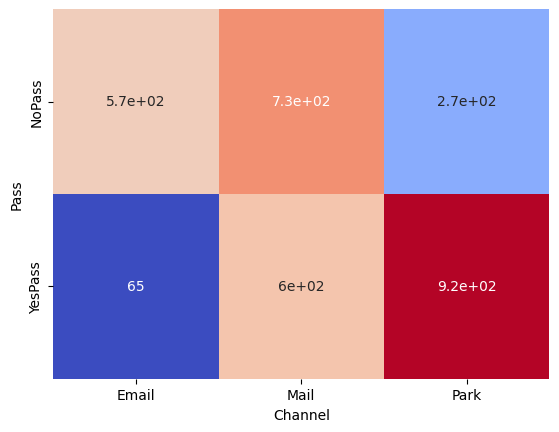

In [9]:
# Visualize the contingency table using a double-decker plot
sns.heatmap(ct, cmap='coolwarm', annot=True, cbar=False)

In [10]:
# Encode the predictor variable as a numeric variable
pass_df['Pass'] = pd.factorize(pass_df['Pass'])[0]

In [11]:
# Build another logistic regression model to predict the probability of getting a pass 
# based on whether or not the customer was offered a promotion and the channel
pass_m2 = sm.formula.logit("Pass ~ Promo + Channel", data=pass_df).fit() 
print(pass_m2.summary())

# Compute the odds ratio of getting a pass when the customer was offered a promotion
# compared to when the customer was not offered a promotion for each channel
odds_ratio = np.exp(pass_m2.params[1:])
print(odds_ratio)

# Compute the confidence interval for the odds ratio
ci = pass_m2.conf_int()
ci['Odds ratio'] = np.exp(pass_m2.params)
ci.columns = ['2.5%', '97.5%', 'Odds ratio']
print(ci)

Optimization terminated successfully.
         Current function value: 0.552948
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   Pass   No. Observations:                 3156
Model:                          Logit   Df Residuals:                     3152
Method:                           MLE   Df Model:                            3
Date:                Thu, 23 Mar 2023   Pseudo R-squ.:                  0.2022
Time:                        19:02:03   Log-Likelihood:                -1745.1
converged:                       True   LL-Null:                       -2187.5
Covariance Type:            nonrobust   LLR p-value:                1.769e-191
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.6388      0.153     17.257      0.000       2.339       2.939
Promo[T.

In [12]:
# Build another logistic regression model to predict the probability of getting a pass
# based on whether or not the customer was offered a promotion, the channel, and the interaction between the promotion and the channel
pass_m3 = sm.formula.logit("Pass ~ Promo + Channel + Promo:Channel", data=pass_df).fit()
print(pass_m3.summary())

# Compute the odds ratio of getting a pass when the customer was offered a promotion
# compared to when the customer was not offered a promotion for each channel
odds_ratio = np.exp(pass_m3.params[1:])
print(odds_ratio)

# Compute the confidence interval for the odds ratio
ci = pass_m3.conf_int()
ci['Odds ratio'] = np.exp(pass_m3.params)
ci.columns = ['2.5%', '97.5%', 'Odds ratio']
print(ci)

Optimization terminated successfully.
         Current function value: 0.537634
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   Pass   No. Observations:                 3156
Model:                          Logit   Df Residuals:                     3150
Method:                           MLE   Df Model:                            5
Date:                Thu, 23 Mar 2023   Pseudo R-squ.:                  0.2243
Time:                        19:02:03   Log-Likelihood:                -1696.8
converged:                       True   LL-Null:                       -2187.5
Covariance Type:            nonrobust   LLR p-value:                6.252e-210
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             0.7813      0.196      3